In [5]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
sns.set(rc={'figure.figsize':(20, 10)})

# Exploração e limpeza dos dados
Incialmente é necessário realizar a limpeza dos dados. Então eu verifico se as tabelas possuem instâncias com valores nulos (null, ou N/A), ou incongruentes (e.g. zero ocorrências de mortes em um ano inteiro). Após a conclusão da limpeza de dados, utilizei esse caderno apenas como rascunho para explorar os dados.

### Estatísticas dos principais atributos das tabelas e visualização dos dados:

In [7]:
municipio = pandas.read_csv('../municipio.csv')
m_causa = pandas.read_csv('../municipio_causa.csv')

municipio.head()

,Unnamed: 0,estado_abrev,id_municipio,ano,numero_obitos
0,0,AP,1600000,1996,3
1,1,AP,1600055,1996,3
2,2,AP,1600105,1996,12
3,3,AP,1600154,1996,3
4,4,AP,1600204,1996,5


In [8]:
m_causa.head()

,Unnamed: 0,estado_abrev,id_municipio,causa_basica,ano,numero_obitos
0,0,AM,1300000,A162,1996,1
1,1,AM,1300000,A419,1996,2
2,2,AM,1300000,B24,1996,1
3,3,AM,1300000,C169,1996,1
4,4,AM,1300000,C240,1996,1


In [9]:
municipio.describe()

,Unnamed: 0,id_municipio,ano,numero_obitos
count,127298.000000,1.272980e+05,127298.000000,127298.000000
mean,63648.500000,3.252854e+06,2007.065429,195.976260
std,36747.911621,9.831020e+05,6.600660,1302.752436
min,0.000000,1.100000e+06,1996.000000,1.000000
25%,31824.250000,2.512721e+06,2001.000000,27.000000
50%,63648.500000,3.146305e+06,2007.000000,56.000000
75%,95472.750000,4.118501e+06,2013.000000,127.000000
max,127297.000000,5.306006e+06,2018.000000,77474.000000


In [10]:
m_causa.describe()

,Unnamed: 0,id_municipio,ano,numero_obitos
count,7.784886e+06,7.784886e+06,7.784886e+06,7.784886e+06
mean,3.892442e+06,3.305091e+06,2.008133e+03,3.204592e+00
std,2.247303e+06,9.129553e+05,6.524809e+00,2.246605e+01
min,0.000000e+00,1.100000e+06,1.996000e+03,1.000000e+00
25%,1.946221e+06,2.702355e+06,2.003000e+03,1.000000e+00
50%,3.892442e+06,3.300233e+06,2.009000e+03,1.000000e+00
75%,5.838664e+06,4.106902e+06,2.014000e+03,2.000000e+00
max,7.784885e+06,5.306006e+06,2.018000e+03,6.726000e+03


### Verifico se existem valores nulos e a quantidade deles

In [11]:
municipio.isnull().sum()

Unnamed: 0       0
estado_abrev     0
id_municipio     0
ano              0
numero_obitos    0
dtype: int64

In [12]:
municipio[municipio['numero_obitos']==1].count()

Unnamed: 0       326
estado_abrev     326
id_municipio     326
ano              326
numero_obitos    326
dtype: int64

### Conclusão da limpeza dos dados

Os dados estão limpos e sem valores nulos, ou incongruentes. O fato de ter ocorrido apenas uma morte em 326 cidades durante um ano inteiro, chama a atenção. Porém, é necessário uma análise mais profunda para entender se este valor é um ruído nos dados (causado por problema na coleta dos dados, por exemplo), ou se realmente reflete a realidade de uma cidade muito pequena.

Irei mudar apenas o nome da coluna "Unnamed: 0" para "id", por organização.

In [13]:
m = municipio.rename(columns={'Unnamed: 0': 'id'})
c = m_causa.rename(columns={'Unnamed: 0': 'id'})

uma = m[m['numero_obitos']==1]
uma['estado_abrev'].count()

326

### Agora irei analisar os dados por região, para tentar identificar algum padrão ou tendência nos dados.

In [14]:
m['estado_abrev'].unique()

array(['AP', 'AC', 'CE', 'AM', 'DF', 'ES', 'BA', 'MG', 'PB', 'PA', 'AL',
       'GO', 'MT', 'MA', 'RN', 'PR', 'RJ', 'MS', 'PI', 'PE', 'RS', 'RO',
       'RR', 'TO', 'SE', 'SC', 'SP'], dtype=object)

In [15]:
ne = m[m['estado_abrev'].isin(['AL','BA', 'CE', 'MA','PB','PE','PI','RN','SE'])]
co = m[m['estado_abrev'].isin(['GO','MT', 'MS', 'DF'])]
no = m[m['estado_abrev'].isin(['AC','AP', 'AM', 'PA','RO','RR','TO'])]
se = m[m['estado_abrev'].isin(['ES','MG', 'RJ', 'SP'])]
sul = m[m['estado_abrev'].isin(['PR','RS', 'SC'])]

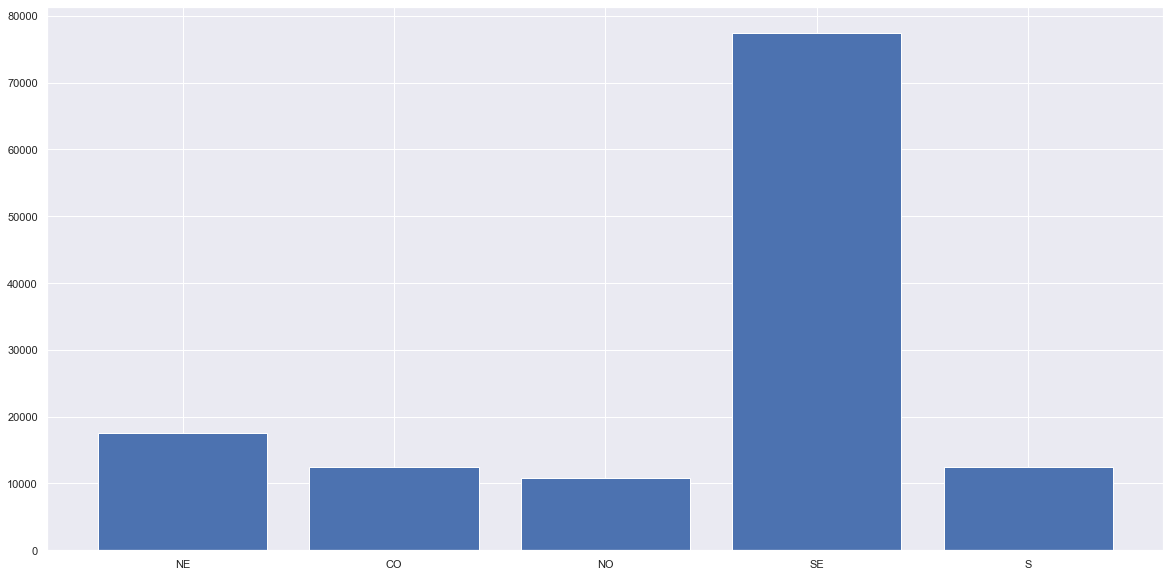

In [16]:
#Região com a cidade com maior número de mortes
max_obitos = [ne['numero_obitos'].max(), co['numero_obitos'].max(), no['numero_obitos'].max(), 
              se['numero_obitos'].max(), sul['numero_obitos'].max()]
bars = ('NE', 'CO', 'NO', 'SE', 'S')

y_pos = np.arange(len(bars))
 
plt.bar(y_pos, max_obitos)
 
plt.xticks(y_pos, bars)
 
plt.show()

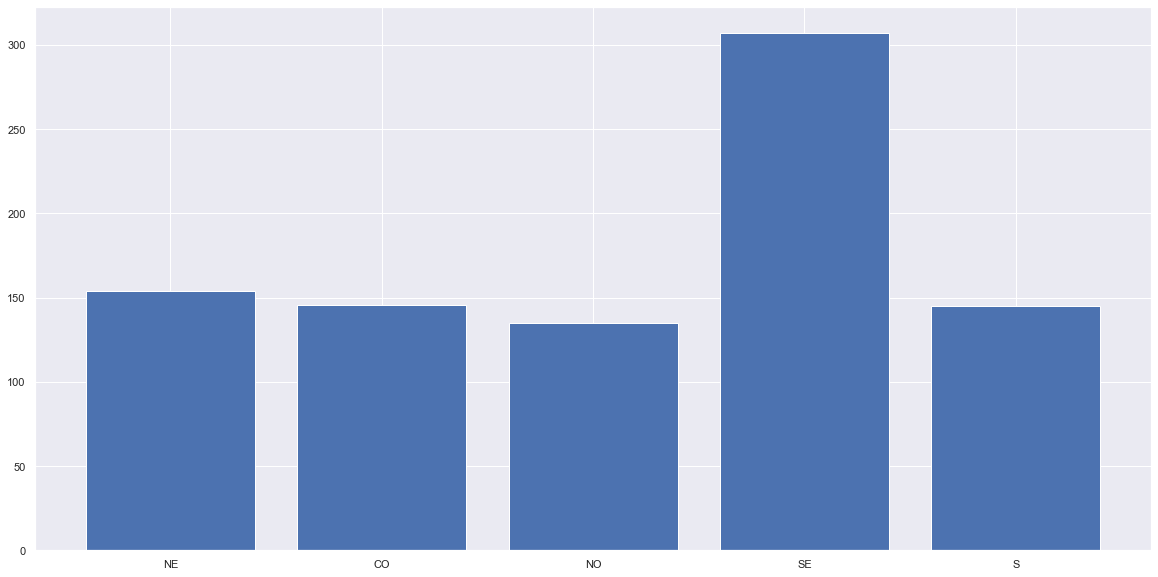

In [17]:
#Média de mortes ocorridas em cada região
mean_obitos = [ne['numero_obitos'].mean(), co['numero_obitos'].mean(), no['numero_obitos'].mean(), 
              se['numero_obitos'].mean(), sul['numero_obitos'].mean()]
bars = ('NE', 'CO', 'NO', 'SE', 'S')

y_pos = np.arange(len(bars))
 
plt.bar(y_pos, mean_obitos)
 
plt.xticks(y_pos, bars)
 
plt.show()

In [18]:
ne['numero_obitos'].sum()

6301059

In [19]:
sul['numero_obitos'].sum()

3932891

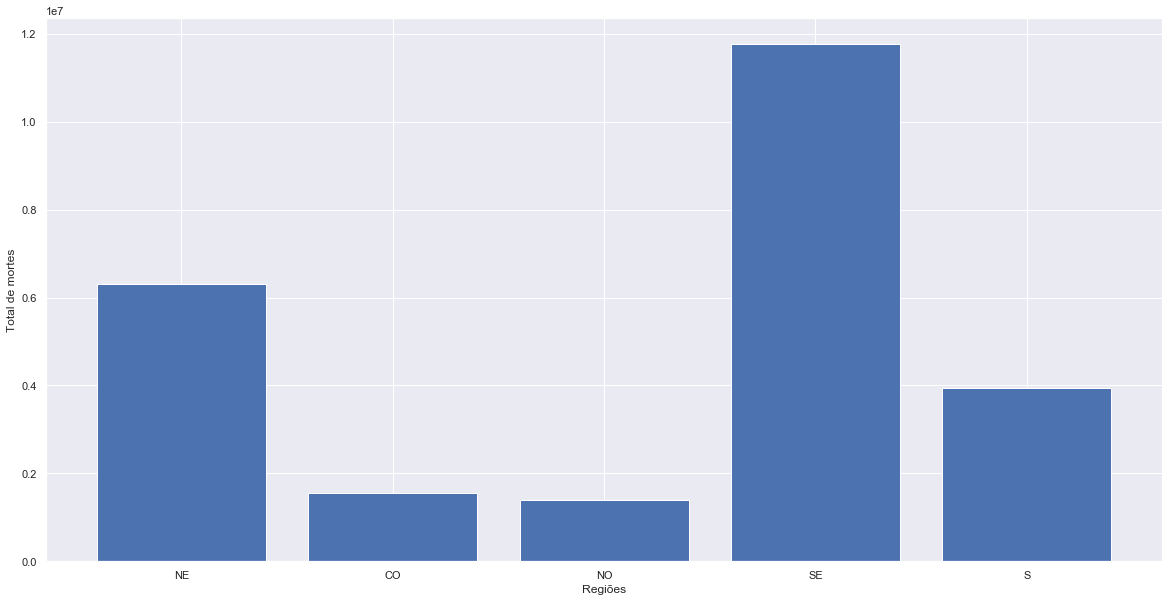

In [20]:
#total de mortes ocorridas em cada região
total_obitos = [ne['numero_obitos'].sum(), co['numero_obitos'].sum(), no['numero_obitos'].sum(), 
              se['numero_obitos'].sum(), sul['numero_obitos'].sum()]
bars = ('NE', 'CO', 'NO', 'SE', 'S')

y_pos = np.arange(len(bars))
 
plt.bar(y_pos, total_obitos)
 
plt.xticks(y_pos, bars)

plt.xlabel('Regiões')
plt.ylabel("Total de mortes")
 
plt.show()

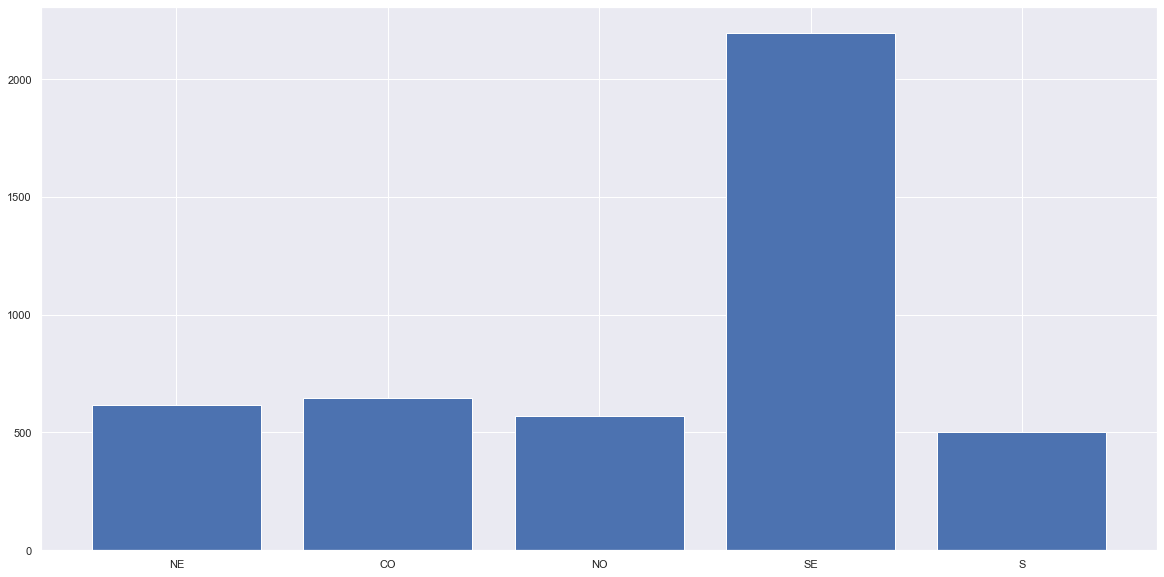

In [21]:
#desvio padrão das mortes ocorridas em cada região
total_obitos = [ne['numero_obitos'].std(), co['numero_obitos'].std(), no['numero_obitos'].std(), 
              se['numero_obitos'].std(), sul['numero_obitos'].std()]
bars = ('NE', 'CO', 'NO', 'SE', 'S')

y_pos = np.arange(len(bars))
 
plt.bar(y_pos, total_obitos)
 
plt.xticks(y_pos, bars)
 
plt.show()

In [22]:
no2 = no.groupby(['id_municipio']).agg({'numero_obitos': 'sum'})

In [23]:
no2.loc[1600000]

numero_obitos    19
Name: 1600000, dtype: int64

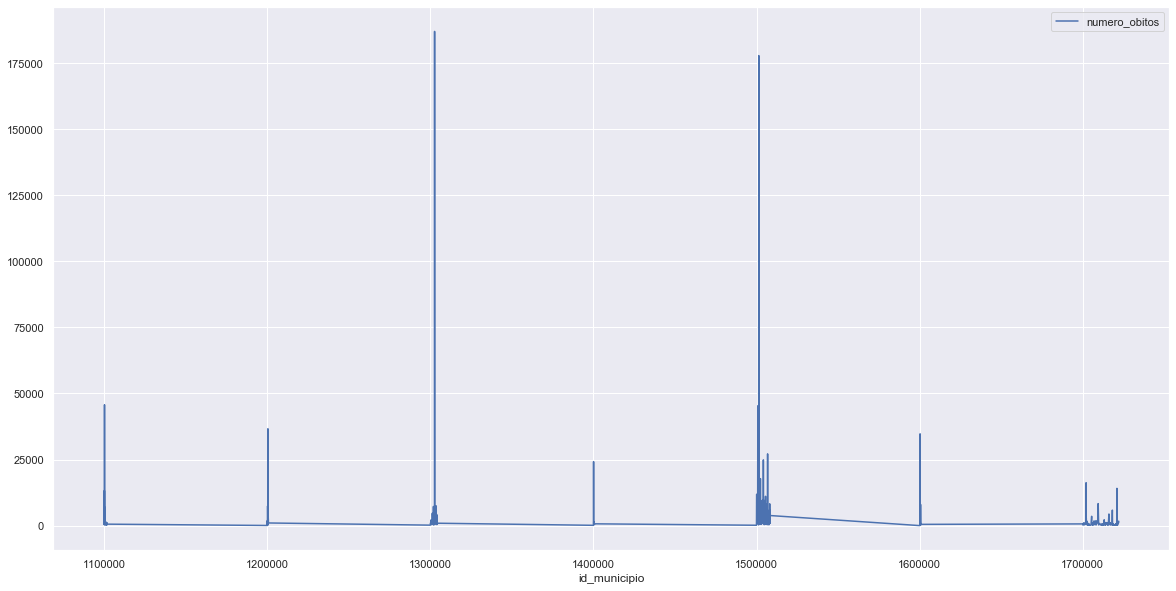

In [24]:
no2.plot()

In [25]:
no[no['id_municipio']==1600000]

,id,estado_abrev,id_municipio,ano,numero_obitos
0,0,AP,1600000,1996,3
6695,6695,AP,1600000,1997,2
73089,73089,AP,1600000,2001,6
96512,96512,AP,1600000,1998,3
96779,96779,AP,1600000,1999,5


In [26]:
municipio[municipio['id_municipio']==1600000]


,Unnamed: 0,estado_abrev,id_municipio,ano,numero_obitos
0,0,AP,1600000,1996,3
6695,6695,AP,1600000,1997,2
73089,73089,AP,1600000,2001,6
96512,96512,AP,1600000,1998,3
96779,96779,AP,1600000,1999,5


In [27]:
ne['numero_obitos']

37        390
38         14
39         44
40        207
41        237
         ... 
125716    145
125717     15
125718    137
125719     95
125720    114
Name: numero_obitos, Length: 40932, dtype: int64

In [28]:
ne.describe()

,id,id_municipio,ano,numero_obitos
count,40932.000000,4.093200e+04,40932.000000,40932.000000
mean,61005.989373,2.523277e+06,2007.089075,153.939680
std,35215.938115,2.854665e+05,6.586810,617.568399
min,37.000000,2.100000e+06,1996.000000,1.000000
25%,32294.750000,2.301307e+06,2001.000000,32.000000
50%,55854.500000,2.508901e+06,2007.000000,64.000000
75%,90181.250000,2.804904e+06,2013.000000,127.000000
max,125720.000000,2.933604e+06,2018.000000,17600.000000


In [29]:
co.describe()

,id,id_municipio,ano,numero_obitos
count,10629.000000,1.062900e+04,10629.000000,10629.000000
mean,64184.788974,5.140040e+06,2007.093330,145.635525
std,36453.918624,1.510935e+05,6.597403,647.457887
min,280.000000,1.700707e+06,1996.000000,1.000000
25%,35307.000000,5.103379e+06,2001.000000,19.000000
50%,64143.000000,5.200902e+06,2007.000000,40.000000
75%,96589.000000,5.212105e+06,2013.000000,93.000000
max,126652.000000,5.306006e+06,2018.000000,12514.000000


In [30]:
no.describe()

,id,id_municipio,ano,numero_obitos
count,10295.000000,1.029500e+04,10295.000000,10295.000000
mean,61030.958038,1.478543e+06,2007.059835,134.895580
std,34405.774799,2.058017e+05,6.596132,570.966494
min,0.000000,1.100000e+06,1996.000000,1.000000
25%,35619.500000,1.302603e+06,2001.000000,19.000000
50%,57547.000000,1.504752e+06,2007.000000,41.000000
75%,88044.500000,1.703602e+06,2013.000000,94.000000
max,125782.000000,1.722107e+06,2018.000000,10837.000000


In [31]:
se.describe()

,id,id_municipio,ano,numero_obitos
count,38334.000000,3.833400e+04,38334.000000,38334.000000
mean,63630.441931,3.301270e+06,2007.013748,307.213596
std,39507.472866,1.858850e+05,6.621948,2197.326327
min,281.000000,3.100000e+06,1996.000000,1.000000
25%,26214.250000,3.136652e+06,2001.000000,30.000000
50%,69159.500000,3.171018e+06,2007.000000,66.000000
75%,101401.750000,3.520004e+06,2013.000000,164.000000
max,127297.000000,3.580586e+06,2018.000000,77474.000000


In [32]:
sul.describe()

,id,id_municipio,ano,numero_obitos
count,27108.000000,2.710800e+04,27108.000000,27108.00000
mean,68447.926811,4.219901e+06,2007.093994,145.08230
std,35424.980899,8.569086e+04,6.594441,503.01627
min,2552.000000,4.100000e+06,1996.000000,1.00000
25%,44731.750000,4.121307e+06,2001.000000,24.00000
50%,71338.500000,4.212700e+06,2007.000000,48.00000
75%,98318.250000,4.309902e+06,2013.000000,107.00000
max,126573.000000,4.323804e+06,2018.000000,12402.00000


In [33]:
bahia = municipio[municipio['estado_abrev']=='BA']
bahia['id_municipio'].unique()

array([2900000, 2900108, 2900207, 2900306, 2900355, 2900405, 2900504,
       2900603, 2900702, 2900801, 2900900, 2901007, 2901106, 2901155,
       2901205, 2901304, 2901353, 2901403, 2901502, 2901601, 2901700,
       2901809, 2901908, 2901957, 2902005, 2902054, 2902104, 2902203,
       2902252, 2902302, 2902401, 2902500, 2902609, 2902658, 2902708,
       2902807, 2902906, 2903003, 2903102, 2903201, 2903235, 2903300,
       2903409, 2903508, 2903607, 2903706, 2903805, 2903904, 2903953,
       2904001, 2904050, 2904100, 2904209, 2904308, 2904407, 2904506,
       2904605, 2904704, 2904753, 2904803, 2904852, 2904902, 2905008,
       2905107, 2905156, 2905206, 2905305, 2905404, 2905503, 2905602,
       2905701, 2905800, 2905909, 2906006, 2906105, 2906204, 2906303,
       2906402, 2906501, 2906600, 2906709, 2906808, 2906824, 2906857,
       2906873, 2906899, 2906907, 2907004, 2907103, 2907202, 2907301,
       2907400, 2907509, 2907558, 2907608, 2907707, 2907806, 2907905,
       2908002, 2908

In [34]:
df = municipio[municipio['id_municipio']==2900000]

In [35]:
anos = df['ano'].sort_values()
anos

353       1996
5191      1997
31435     1998
111975    1999
45102     2000
16036     2001
12896     2002
100158    2003
96796     2004
53825     2005
Name: ano, dtype: int64

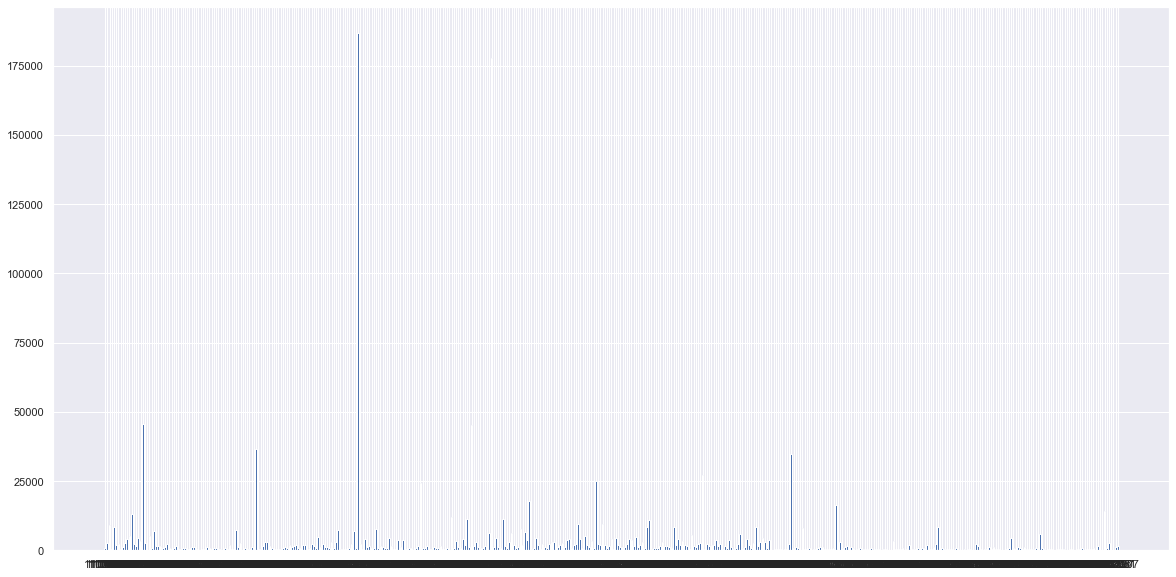

In [36]:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(no2.index))
 
plt.bar(y_pos, no2['numero_obitos'])
 
plt.xticks(y_pos, no2.index)

plt.show()

In [37]:
#ax = sns.boxplot(x="id_municipio", y="numero_obitos", data=no)
#no2.index
#no2[no2['numero_obitos']==19].count()
#no2.describe()